# Defining custom Image Dataset loader and usage
![](https://drive.google.com/uc?id=19OgB7mwWLE_fGBOMG-QQ5ryVqQk3DpQT)

In [1]:
import torch
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [2]:
!unzip '/content/Classification_dataset_v3.zip'

Archive:  /content/Classification_dataset_v3.zip
   creating: Classification_dataset_v3/
  inflating: Classification_dataset_v3/Dataset_info.txt  
   creating: Classification_dataset_v3/images/
   creating: Classification_dataset_v3/images/test/
   creating: Classification_dataset_v3/images/test/Cat/
  inflating: Classification_dataset_v3/images/test/Cat/cat_1000.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1001.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1002.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1003.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1004.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1005.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1006.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1007.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1008.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1009.jpg 

In [3]:
image_dir = '/content/Classification_dataset_v3/images/train'
for label, class_dir in enumerate(os.listdir(image_dir)):
  print(label, class_dir)

0 person
1 Cat
2 Dog


In [6]:
class ImageDataset(Dataset):
  def __init__(self, image_dir, transform=None):
    self.image_dir = image_dir
    self.image_paths = []
    self.labels = []
    self.class_name = {}
    self.transform = transform

    for label, class_dir in enumerate(os.listdir(image_dir)):
      self.class_name[label] = class_dir
      class_path = os.path.join(image_dir, class_dir)
      for img_name in os.listdir(class_path):
        self.image_paths.append(os.path.join(class_path, img_name))
        self.labels.append(label)

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, idx):
    img_path = self.image_paths[idx]
    image = Image.open(img_path).convert("RGB")
    label = self.labels[idx]

    if self.transform:
      image = self.transform(image)

    return image, label

In [7]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()]
)

In [8]:
train_image_dir = '/content/Classification_dataset_v3/images/train'
test_image_dir = '/content/Classification_dataset_v3/images/test'

train_image_dataset = ImageDataset(image_dir=train_image_dir, transform=transform)
test_image_dataset = ImageDataset(image_dir=test_image_dir, transform=transform)

In [9]:
train_image_loader = DataLoader(dataset=train_image_dataset, batch_size=32, shuffle=True)
test_image_loader = DataLoader(dataset=test_image_dataset, batch_size=32, shuffle=True)

In [10]:
for images,labels in train_image_loader:
  print(images.shape, labels.shape)

torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([3

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
print(train_image_dataset.class_name)
print(test_image_dataset.class_name)

{0: 'person', 1: 'Cat', 2: 'Dog'}
{0: 'person', 1: 'Cat', 2: 'Dog'}


torch.Size([32, 3, 128, 128]) torch.Size([32])
(3, 128, 128)
Dog
(128, 128, 3)
2


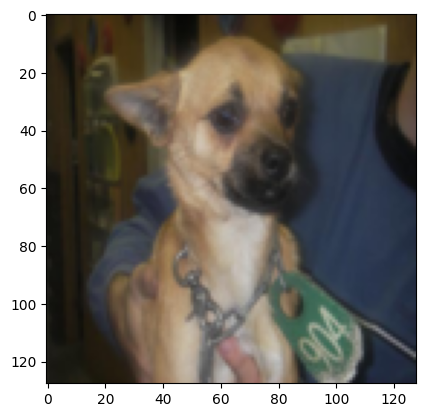

In [16]:
for images, labels in train_image_loader:
  print(images.shape, labels.shape)
  img = images[0].numpy()
  print(img.shape)
  label = labels[0].item()
  print(train_image_dataset.class_name[label])
  img = np.transpose(img, (1,2,0))
  print(img.shape)
  print(label)
  plt.imshow(img, vmin=0, vmax=255)
  break